### working logistic regression file by william

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.preprocessing import OneHotEncoder


sb.set()

In [2]:
def train_test_split_func(X,y,test_size): # This function retunrs X_train,X_test,y_train,y_test as a list

    data = list(train_test_split(X,y,test_size=test_size))
    print(f'X_train: {data[0].shape}')
    print(f'X_test: {data[1].shape}')
    print(f'y_train: {data[2].shape}')
    print(f'y_test: {data[3].shape}')

    return data 

In [3]:
def logistic_regression(model,X_train,X_test,y_train,y_test):  # This function returns the y_train_predict and the y_test_predict
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    accuracy_train = model.score(X_train,y_train)
    accuracy_test = accuracy_score(y_test,y_test_pred)

    print(f'Train Accuracy: {accuracy_train}')
    print(f" Test Accuracy: {accuracy_test}")
    return y_train_pred,y_test_pred 

In [4]:
def confusion_matrix_func(y_test,y_test_pred):

    sb.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f", annot_kws={"size": 18})

    # Print the Accuracy Measures from the Confusion Matrix
    cmTest = confusion_matrix(y_test, y_test_pred)
    tpTest = cmTest[1][1] # True Positives 
    fpTest = cmTest[0][1] # False Positives 
    tnTest = cmTest[0][0] # True Negatives 
    fnTest = cmTest[1][0] # False Negatives 

    print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
    print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
    print()

    print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
    print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
    print()

    precision_test_rf = precision_score(y_test,y_test_pred, pos_label = 'Approved')
    recall_test_rf = recall_score(y_test,y_test_pred, pos_label = 'Approved')
    f1_test_rf = f1_score(y_test,y_test_pred, pos_label='Approved')
    print("Precision: {0:.4f}" .format(precision_test_rf)) 
    print("Recall: {0:.4f}" .format(recall_test_rf))
    print("F-score: {0:.4f}" .format(f1_test_rf))


In [5]:
creditcardData = pd.read_csv('credit-approval_csv.csv')
creditcardData.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+,Approved


In [6]:
ccData = pd.DataFrame(creditcardData[['Debt','Income','YearsEmployed','CreditScore','Approved_Status']])
ccData.head()

,Debt,Income,YearsEmployed,CreditScore,Approved_Status
0,0.000,0,1.25,1,Approved
1,4.460,560,3.04,6,Approved
2,0.500,824,1.50,0,Approved
3,1.540,3,3.75,5,Approved
4,5.625,0,1.71,0,Approved


In [7]:
ccData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Debt             690 non-null    float64
 1   Income           690 non-null    int64  
 2   YearsEmployed    690 non-null    float64
 3   CreditScore      690 non-null    int64  
 4   Approved_Status  690 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 27.1+ KB


In [8]:
ccData.describe()

,Debt,Income,YearsEmployed,CreditScore
count,690.000000,690.000000,690.000000,690.00000
mean,4.758725,1017.385507,2.223406,2.40000
std,4.978163,5210.102598,3.346513,4.86294
min,0.000000,0.000000,0.000000,0.00000
25%,1.000000,0.000000,0.165000,0.00000
50%,2.750000,5.000000,1.000000,0.00000
75%,7.207500,395.500000,2.625000,3.00000
max,28.000000,100000.000000,28.500000,67.00000


In [9]:
y = pd.DataFrame(ccData['Approved_Status'])
X = pd.DataFrame(ccData.drop('Approved_Status',axis=1))
y = y.squeeze()

In [10]:
[X_train, X_test, y_train, y_test] = train_test_split_func(X,y,0.3)

X_train: (483, 4)
X_test: (207, 4)
y_train: (483,)
y_test: (207,)


In [11]:
model = LogisticRegression()
y_train_pred,y_test_pred = logistic_regression(model,X_train,X_test,y_train,y_test)

Train Accuracy: 0.772256728778468
 Test Accuracy: 0.7439613526570048


TPR Test :	 0.8974358974358975
TNR Test :	 0.6095238095238096

FPR Test :	 0.3904761904761905
FNR Test :	 0.10256410256410256

Precision: 0.8205
Recall: 0.6095
F-score: 0.6995


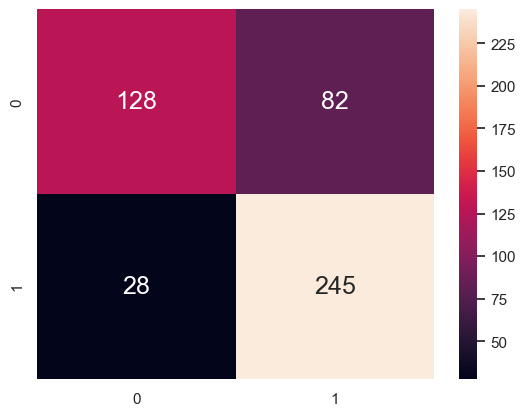

In [12]:
confusion_matrix_func(y_train,y_train_pred)

TPR Test :	 0.9
TNR Test :	 0.5670103092783505

FPR Test :	 0.4329896907216495
FNR Test :	 0.1

Precision: 0.8333
Recall: 0.5670
F-score: 0.6748


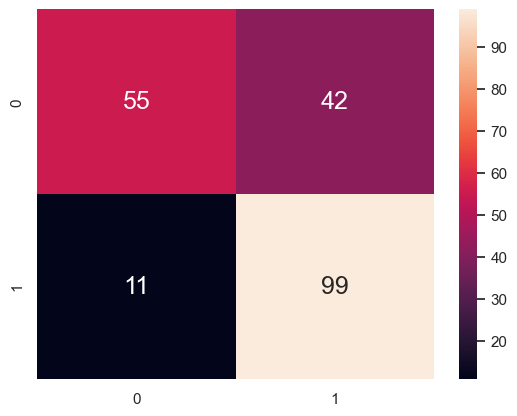

In [13]:
confusion_matrix_func(y_test,y_test_pred)

In [14]:
# y = pd.DataFrame(ccData['Approved_Status'])
# X = pd.DataFrame(ccData.drop(['Approved_Status','Income','Debt','YearsEmployed'],axis=1))
# y = y.squeeze()

In [15]:
# [X_train,X_test,y_train,y_test] = train_test_split_func(X,y,0.2)

In [16]:
# y_train_pred,y_test_pred = logistic_regression(X_train,X_test,y_train,y_test)

In [17]:
# confusion_matrix_func(y_test,y_test_pred)

# Scaled 

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
X_train_scaled

array([[ 2.96929275,  0.62777826,  1.11228643,  0.89416935],
       [-0.35326836, -0.10348583, -0.08596325,  3.29463511],
       [-0.35326836, -0.24856863, -0.19548948, -0.50610234],
       ...,
       [ 1.35029934,  0.10477818, -0.16769925, -0.50610234],
       [-0.7056612 , -0.18831246, -0.23635748,  0.0940141 ],
       [-0.20224285, -0.19123752, -0.68590545,  0.69413054]])

In [21]:
model = LogisticRegression()
y_train_pred,y_test_pred =  logistic_regression(model,X_train_scaled,X_test_scaled,y_train,y_test)

Train Accuracy: 0.7763975155279503
 Test Accuracy: 0.7536231884057971


TPR Test :	 0.9047619047619048
TNR Test :	 0.6095238095238096

FPR Test :	 0.3904761904761905
FNR Test :	 0.09523809523809523

Precision: 0.8312
Recall: 0.6095
F-score: 0.7033


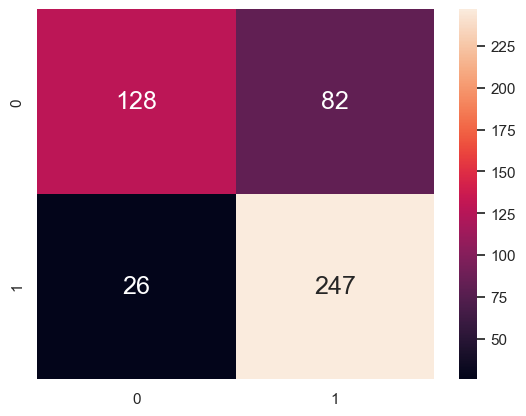

In [22]:
confusion_matrix_func(y_train,y_train_pred)

TPR Test :	 0.9272727272727272
TNR Test :	 0.5567010309278351

FPR Test :	 0.44329896907216493
FNR Test :	 0.07272727272727272

Precision: 0.8710
Recall: 0.5567
F-score: 0.6792


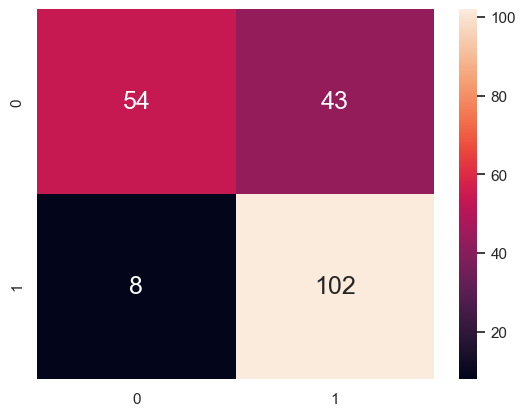

In [23]:
confusion_matrix_func(y_test,y_test_pred)

NULL VALUES REMOVED

In [24]:
ccData = pd.DataFrame(creditcardData[['Debt','Income','YearsEmployed','CreditScore','Approved_Status']])
ccData.dropna(inplace=True);

In [25]:
y = pd.DataFrame(ccData['Approved_Status'])
X = pd.DataFrame(ccData.drop('Approved_Status',axis=1))
y = y.squeeze()

In [26]:
[X_train, X_test, y_train, y_test] = train_test_split_func(X,y,0.3)

X_train: (483, 4)
X_test: (207, 4)
y_train: (483,)
y_test: (207,)


In [27]:
model = LogisticRegression()
y_train_pred,y_test_pred = logistic_regression(model,X_train,X_test,y_train,y_test)

Train Accuracy: 0.7681159420289855
 Test Accuracy: 0.7681159420289855


TPR Test :	 0.8969465648854962
TNR Test :	 0.6153846153846154

FPR Test :	 0.38461538461538464
FNR Test :	 0.10305343511450382

Precision: 0.8344
Recall: 0.6154
F-score: 0.7083


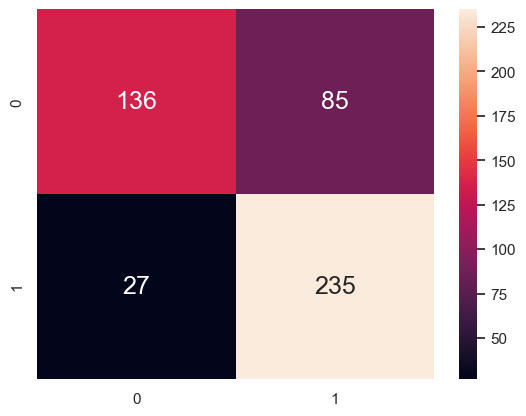

In [28]:
confusion_matrix_func(y_train,y_train_pred)

TPR Test :	 0.8925619834710744
TNR Test :	 0.5930232558139535

FPR Test :	 0.4069767441860465
FNR Test :	 0.10743801652892562

Precision: 0.7969
Recall: 0.5930
F-score: 0.6800


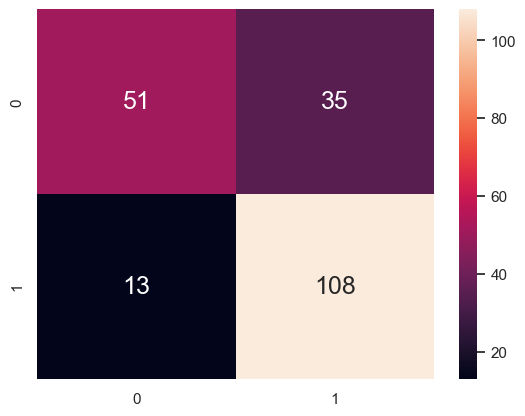

In [29]:
confusion_matrix_func(y_test,y_test_pred)

Building Logistic Regression with Hyperparameter

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# Hyper parameters
logModel = LogisticRegression()
param_grid = [
    {'penalty' : ['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100,1000,2500,5000]
    }
]

In [32]:
clf = GridSearchCV(logModel,param_grid=param_grid, cv = 3, verbose=True, n_jobs= -1)

In [33]:
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


c:\Users\zhixi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\zhixi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\zhixi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\zhixi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(

In [34]:
print(best_clf.best_estimator_)
print(np.abs(best_clf.best_score_))

LogisticRegression(C=0.012742749857031334)
0.7660455486542442
